# Análise Exploratória de Dados (EDA) – King County Housing
Este notebook realiza uma análise detalhada do dataset de preços de casas em King County, explorando variáveis como número de quartos, banheiros, área interna e bairros, com o objetivo de preparar os dados para modelagem preditiva.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Converter 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# Extrair ano e mês da venda
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [6]:
# Verificando Valores Ausentes
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
month_sold       0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Visualizar Distribuições

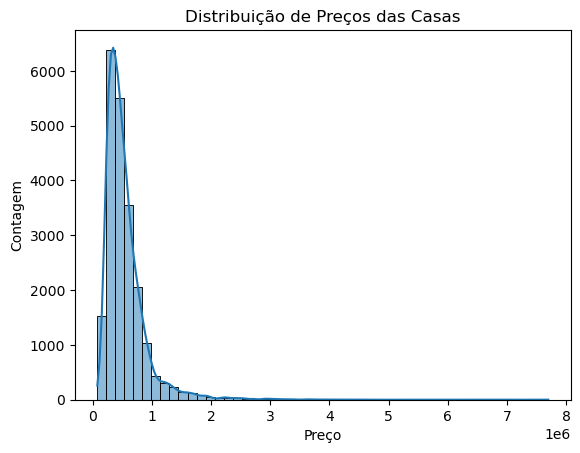

Preço mínimo: 75000.0
Preço máximo: 7700000.0
Preço médio: 540088.1417665294


In [8]:
plt.figure()
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuição de Preços das Casas')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.show()

# Estatísticas de preço
print("Preço mínimo:", df['price'].min())
print("Preço máximo:", df['price'].max())
print("Preço médio:", df['price'].mean())

### Distribuição de outras variáveis numéricas

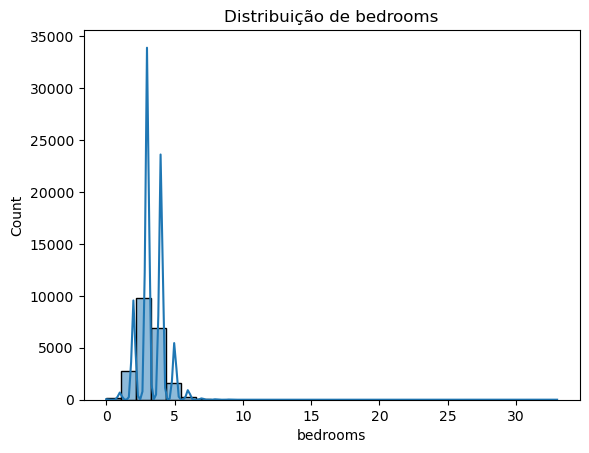

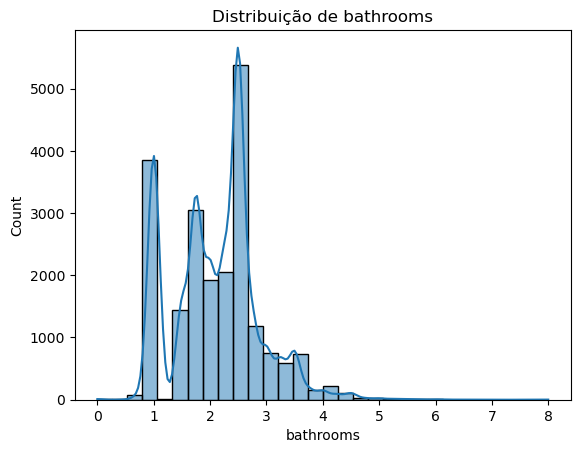

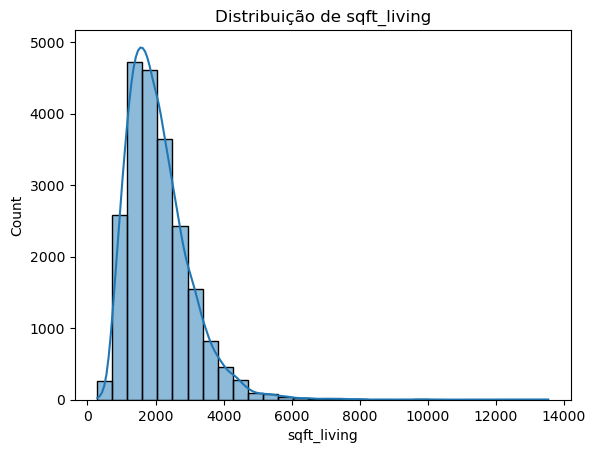

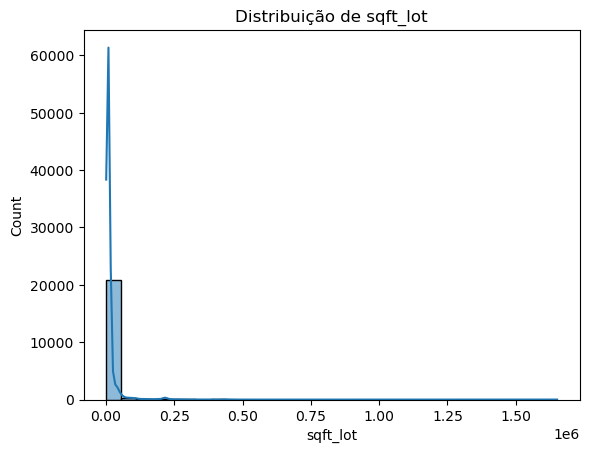

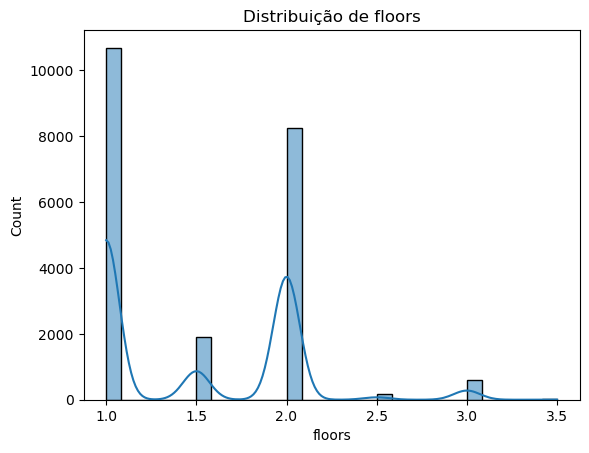

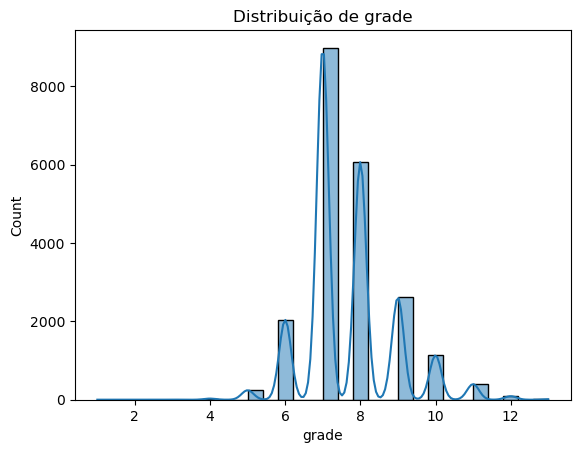

In [9]:
numerical_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

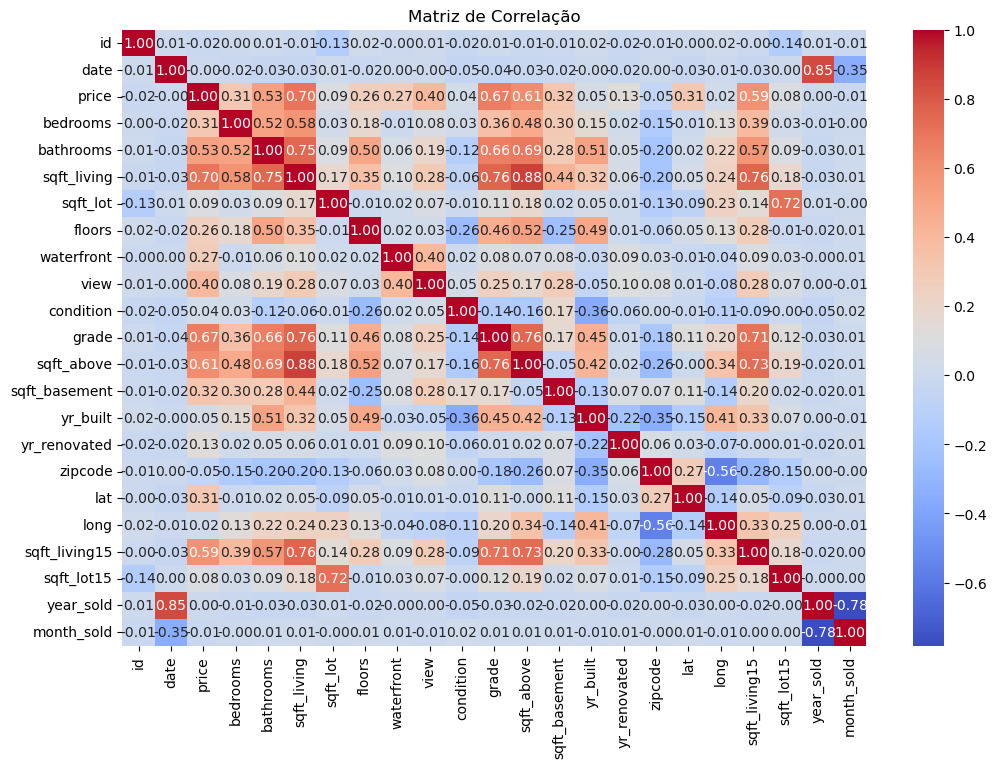

In [10]:
# Corelações entre vriáveis

corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### Relação entre Banheiros x Tamanho da Casa

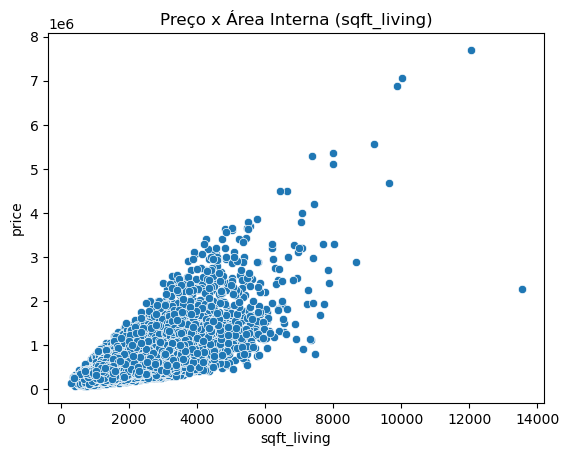

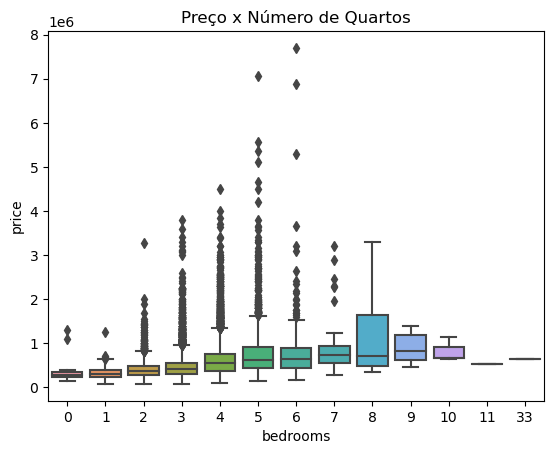

In [11]:
plt.figure()
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Preço x Área Interna (sqft_living)')
plt.show()

plt.figure()
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Preço x Número de Quartos')
plt.show()

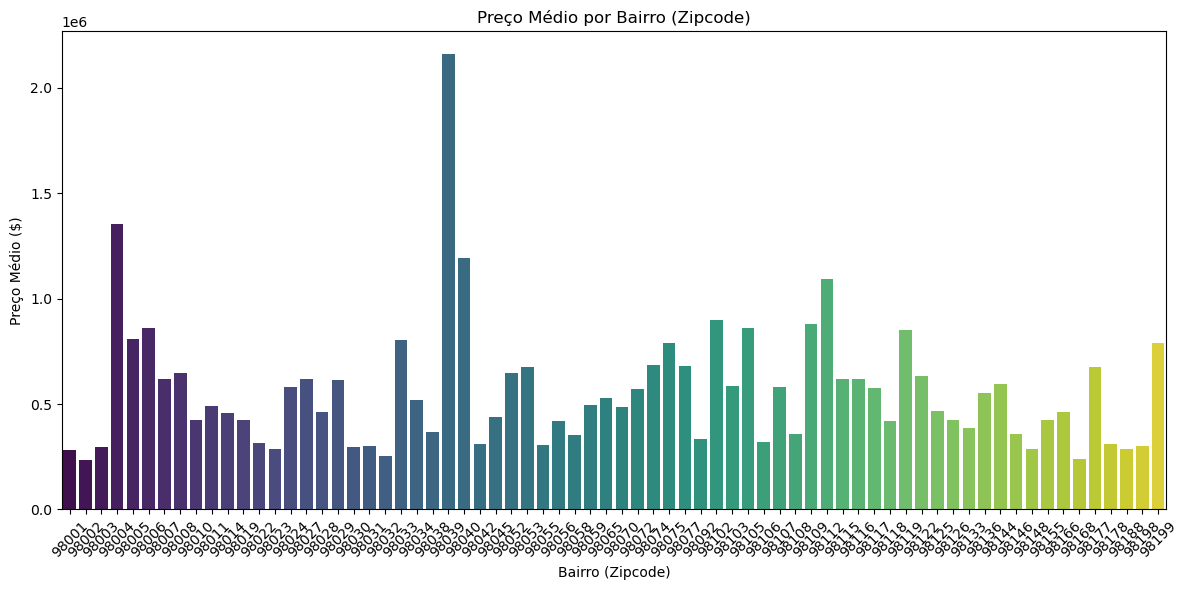

In [12]:
# Preço por bairro (zipcode)

preco_bairro = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    x=preco_bairro.index,
    y=preco_bairro.values,
    palette='viridis'
)
plt.title('Preço Médio por Bairro (Zipcode)')
plt.xlabel('Bairro (Zipcode)')
plt.ylabel('Preço Médio ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

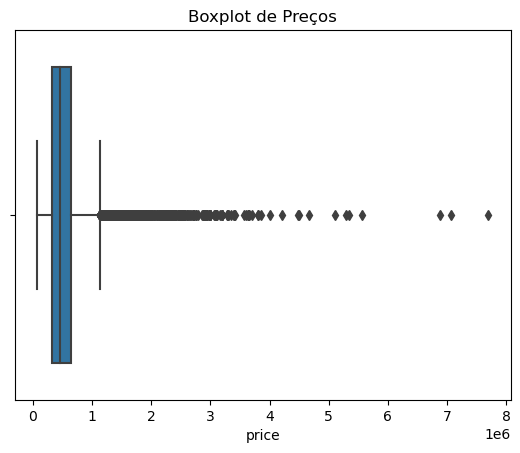

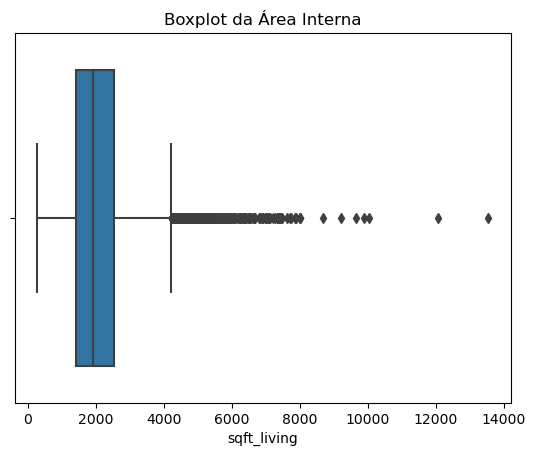

In [13]:
# Identificação visual de outliers no preço e área interna
sns.boxplot(x=df['price'])
plt.title('Boxplot de Preços')
plt.show()

sns.boxplot(x=df['sqft_living'])
plt.title('Boxplot da Área Interna')
plt.show()

### Insights iniciais da EDA

- Preço médio: cerca de $540.000 (depende dos dados).
- Casas com mais sqft_living e grade maior tendem a ter preço mais alto.
- Quartos e banheiros têm relação com preço, mas nem sempre linear.
- Certos bairros (zipcode) são significativamente mais caros.
- Outliers existem (casas muito caras ou muito grandes), podem impactar o modelo.